# Proyek Analisis Data: [BIKE-SHARING-DATASET]
- **Nama:** Hilal Fahri Husen
- **Email:** Hilalfahri11@gmail.com
- **ID Dicoding:** hilal_fahri_husen



## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi musim terhadap angka peminjaman sepeda?
- Bagaimana pengaruh kondisi cuaca terhadap angka peminjaman sepeda?
- Dalam rentang waktu kapan peminjaman sepeda mencapai titik tertinggi? (Analisis Lanjutan)

## Import Semua Packages/Library yang Digunakan

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [27]:
#Mendapatkan Data
df_hour = pd.read_csv('/content/hour.csv')

Data bike rental (hours)

[link text](https://drive.google.com/file/d/1PiHT3KrXvrb91ji3yqpgccB52GZGDgLp/view?usp=drive_link)

Data bike rental (hour)

[link text](https://drive.google.com/file/d/1H5PolbmaYmrTEkqMIWMy2KkPxu_3-s93/view?usp=drive_link)


**Insight:**
- Mendapatkan data dapat diperoleh dengan mencari data raw dari Kaggle ataupun sumber lain. Selain itu data juga bisa didapatkan dari pengambilan secara langsung dilapangan

### Assessing Data

In [28]:
#Akses Data
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Melakukan akses data dengan method .head . Hal ini digunakan untuk mengetahui feature-feature yang terdapat pada data frame

In [29]:
#Pengecekan Duplicate Value

cek_null = df_hour.isnull().sum()
cek_NA = df_hour.isna().sum()
cek_duplicated = df_hour.duplicated().sum()

print(cek_NA)
print('''

''')
print(cek_null)
print('''

''')
print(cek_duplicated)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



0


**Insight:**
- Pada tahap assesing data kita dapat coba mengecek kesalahan nilai pada data kita. Kesalahan nilai dapat berupa data duplikat dan data yang kosong. Pengecekan dapat dibantu dengan method isnull() untuk pengecekan nilai null, isna() untuk pengecekan nilai NA, duplicate() unutk mengecek duplicate, dan sum() untuk menjumlahkan berapa banyak data yang mengalami kesalahan.

- Pada pengecekan diatas didapatkan bahwa tidak terdapat nilai duplicat, null, dan NA

### Cleaning Data

In [30]:
#Penanganan Outliers

Q1 = (df_hour['cnt']).quantile(0.25)
Q3 = (df_hour['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df_hour['cnt'] < minimum
kondisi_more_than = df_hour['cnt'] > maximum

cek_outlier1 = kondisi_lower_than.sum()
cek_outlier2 = kondisi_more_than.sum()

print(cek_outlier1)
print(cek_outlier2)



0
505


**Insight:**
- Cleaning Data salah satunya berisi terkait menghapus menghapus outlier pada data. Hal ini dibantu dengan beberapa perhitungan statistic terhadap data, antara lain perhitungan quartile lalu menentukan kondisi maximal dan minimal pada data. Data yang dipakai untuk perhitungan ini adalah data dari cnt yang berisi total perentalan sepeda.
- Proses diatas merupakan pengecekan nilai yang termasuk outlier

In [31]:
#Penghapusan nilai outlier

df_hour.drop(df_hour[kondisi_lower_than].index, inplace=True)
df_hour.drop(df_hour[kondisi_more_than].index, inplace=True)

df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Proses diatas adalah proses untuk penghapusan nilai yang tergolong outlier d

In [32]:
#Penambahan deskripsi angka pada kolom season, weather, dan holiday

weather_mapping = {
    1: "Clear, Few clouds",
    2: "Mist + Cloudy, Mist",
    3: "Light Snow, Light Rain clouds",
    4: "Heavy Rain"
}

# Menambahkan kolom baru 'weather_desc' berdasarkan referensi kolom 'weathersit'
df_hour['weather_desc'] = df_hour['weathersit'].map(weather_mapping)

season_mapping = {
    1: "spring",
    2: "summer",
    3: "fall",
    4: "winter"
}

# Menambahkan kolom baru 'season_desc' berdasarkan referensi kolom 'season'
df_hour['season_desc'] = df_hour['season'].map(season_mapping)

Holiday_mapping = {
    0: "Working hour",
    1: "Holiday"
}

# Menambahkan kolom baru 'hour_desc' berdasarkan referensi kolom 'holihour'
df_hour['day_desc'] = df_hour['holiday'].map(Holiday_mapping)


# Menampilkan hasil
print(df_hour)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

**Insight:**

- Pada data ini saya ingin menambahkan kolom terkait nilai sebenarnya dari angka pada kolom season, weathersit, holiday sesuai yang tertera pada readme. Hal ini merupakann bagian cleaning data sehingga data akan siap digunakan untuk analisis

In [33]:
#Binning Technique Untuk Pengelompokan Waktu

cutoff = [-1,3,9,15,20,23]
labels = ["Dini Hari","Pagi Hari","Siang Hari","Sore Hari","Malam Hari"]
df_hour ['Time_Desc'] = pd.cut(df_hour["hr"],bins=cutoff,labels=labels)
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,weather_desc,season_desc,day_desc,Time_Desc
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0000,3,13,16,"Clear, Few clouds",spring,Working hour,Dini Hari
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0000,8,32,40,"Clear, Few clouds",spring,Working hour,Dini Hari
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0000,5,27,32,"Clear, Few clouds",spring,Working hour,Dini Hari
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0000,3,10,13,"Clear, Few clouds",spring,Working hour,Dini Hari
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0000,0,1,1,"Clear, Few clouds",spring,Working hour,Pagi Hari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,0.2576,0.60,0.1642,11,108,119,"Mist + Cloudy, Mist",spring,Working hour,Sore Hari
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,0.2576,0.60,0.1642,8,81,89,"Mist + Cloudy, Mist",spring,Working hour,Sore Hari
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,0.2576,0.60,0.1642,7,83,90,"Clear, Few clouds",spring,Working hour,Malam Hari
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,0.2727,0.56,0.1343,13,48,61,"Clear, Few clouds",spring,Working hour,Malam Hari


**Insight:**

- Pada data ini saya ingin mengelompokan waktu menjadi pagi, siang, sore, etc. Dalam hal ini saya akan lakukan pengelompokan pada data kolom hr sehingga didapatkan suatu pengelompokan waktu berdasarkan pagi,siang,malam etc

## Exploratory Data Analysis (EDA)

### Explore ...

In [34]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
mean,8542.168899,2.490399,0.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
std,5007.766040,1.111966,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.171878,0.192600,0.122460,45.896591,126.052802,155.020918
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000
50%,8438.500000,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.179100,15.000000,111.000000,135.000000
75%,12832.750000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,45.000000,208.000000,265.750000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,354.000000,629.000000,642.000000


**Insight:**

- .describe() digunakan untuk mengetahu beberapa parameter statistik pada data yang kita miliki. Pada metode describe() kita dapat mengetahui jumlah data, rata-rata, standar deviasi, quartil 1, quartil 2, quartil 3, nilai max, dan nilai min. Semua nilai ini sangat bermanfaat untuk pemrosesan statistik.

In [35]:
#from google.colab import files
#df_rentals_byseason.to_csv('Rental_by_Season.csv', index=False)
#files.download('Rental_by_Season.csv')

df_rentals_byseason = df_hour.groupby(by="season_desc", as_index=False
).agg(
    sum_hour=("instant", "nunique"),   # Jumlah hari unik
    total_rentals=("cnt", "sum"),     # Total rental sepeda
    rentals_per_hours =("cnt", "mean")      # Rata-rata rental sepeda
).sort_values(by="total_rentals", ascending=False)


print(df_rentals_byseason)

  season_desc  sum_hour  total_rentals  rentals_per_hours
0        fall      4298         909146         211.527687
2      summer      4253         805771         189.459440
3      winter      4100         741576         180.872195
1      spring      4223         457818         108.410609


**Insight:**

- Pada data ini saya ingin membuat suatu kolom dengan data dari jumlah perentalan pada setiap musim yang ada. Untuk mengetahui musim kesukaan masyarakat dalam perentalan sepeda

In [36]:
df_rentals_byweather= df_hour.groupby(by="weather_desc", as_index=False
).agg(
    sum_hour=("instant", "nunique"),   # Jumlah hari unik
    total_rentals=("cnt", "sum"),     # Total rental sepeda
    rentals_per_hours =("cnt", "mean")      # Rata-rata rental sepeda
).sort_values(by="total_rentals", ascending=False)


print(df_rentals_byweather)

                    weather_desc  sum_hour  total_rentals  rentals_per_hours
0              Clear, Few clouds     11020        2042163         185.314247
3            Mist + Cloudy, Mist      4444         722712         162.626463
2  Light Snow, Light Rain clouds      1407         149213         106.050462
1                     Heavy Rain         3            223          74.333333


**Insight:**

- Pada data ini saya ingin membuat suatu kolom dengan data dari jumlah perentalan pada setiap cuaca yang ada. Untuk mengetahui cuaca kesukaan masyarakat dalam perentalan sepeda

In [37]:
df_rentals_bytimedesc= df_hour.groupby(by="Time_Desc", as_index=False
).agg(
    sum_hour=("instant", "nunique"),   # Jumlah hari unik
    total_rentals=("cnt", "sum"),     # Total rental sepeda
    rentals_per_hours =("cnt", "mean")      # Rata-rata rental sepeda
)

print(df_rentals_bytimedesc)

    Time_Desc  sum_hour  total_rentals  rentals_per_hours
0   Dini Hari      2862          87820          30.684836
1   Pagi Hari      4193         558145         133.113523
2  Siang Hari      4299         957615         222.752966
3   Sore Hari      3336        1025733         307.473921
4  Malam Hari      2184         284998         130.493590


<ipython-input-37-f8343f33da66>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rentals_bytimedesc= df_hour.groupby(by="Time_Desc", as_index=False


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-38-4abb0e30e09e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(df_pertanyaan1,
<ipython-input-38-4abb0e30e09e>:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.barplot(df_pertanyaan1,


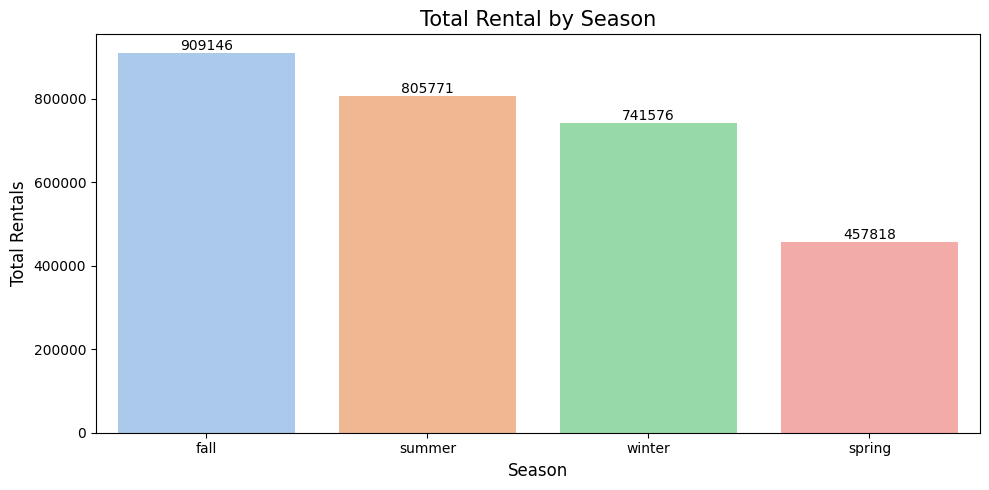

In [38]:
# Filter data
df_pertanyaan1 = df_rentals_byseason[['season_desc', 'total_rentals']]

# Set palet warna
colors = sns.color_palette("pastel")

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(df_pertanyaan1,
    y="total_rentals",
    x="season_desc",
    palette=colors
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Tambahkan judul dan label sumbu
plt.title("Total Rental by Season", loc="center", fontsize=15)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Tampilkan plot
plt.show()


**Insight:**
- Pada grafik diatas dapat dikatakan bahwa jumlah perentalan tertinggi terdapat pada musim gugur dan paling sedikit pada musim semi.

- Sehingga apabila pada grafik ini perental dapat melakukan alokasi unit perentalan atau pembelian unit baru pada musim gugur dibandingkan musim lain.

### Pertanyaan 2:

<ipython-input-39-8599f79a2d1a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-39-8599f79a2d1a>:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.barplot(


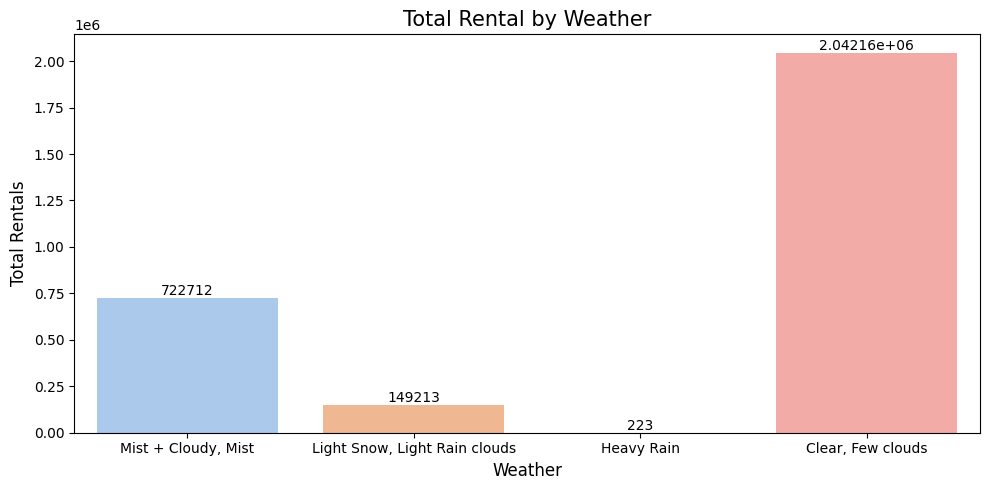

In [39]:
# Filter data
df_pertanyaan2 = df_rentals_byweather[['weather_desc', 'total_rentals']]

# Set palet warna
colors = sns.color_palette("pastel")

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    y="total_rentals",
    x="weather_desc",
    data=df_pertanyaan2.sort_values(by="weather_desc", ascending=False),
    palette=colors
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Tambahkan judul dan label sumbu
plt.title("Total Rental by Weather", loc="center", fontsize=15)
plt.xlabel("Weather", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Tampilkan plot
plt.show()


**Insight:**
- Jumlah perentalan tertinggi berdasarkan cuaca tertinggi terdapat pada cuaca clear, Few Clouds dan terendah pada heavy rain. Hal ini sangat beralasan sekali karena saat cuaca cerah kita lebih ingin merental sepeda daripada saat cuaca hujan deras.

## Analisis Lanjutan (Opsional)

<ipython-input-40-19aeecedd08c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-40-19aeecedd08c>:9: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.barplot(


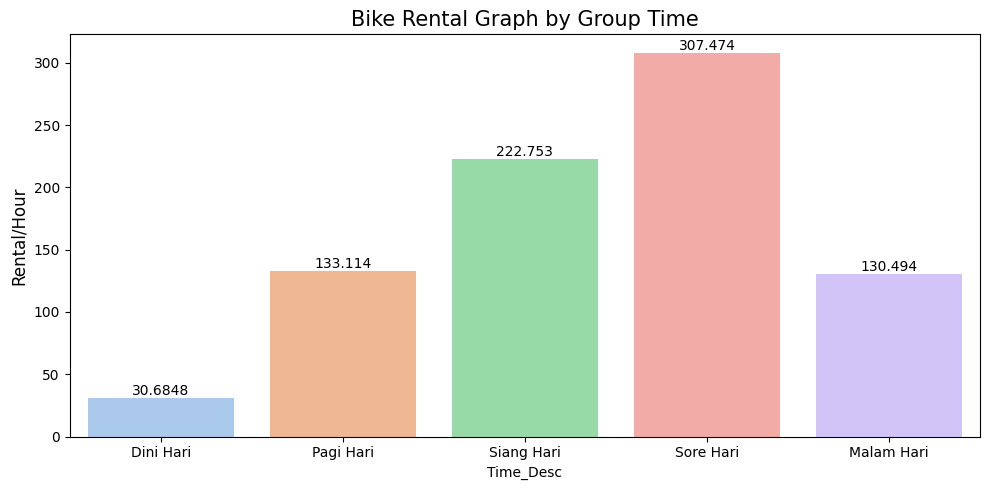

In [40]:
# Filter data
df_pertanyaan3 = df_rentals_bytimedesc[['Time_Desc', 'rentals_per_hours']]

# Set palet warna
colors = sns.color_palette("pastel")

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    y="rentals_per_hours",
    x="Time_Desc",
    data=df_pertanyaan3.sort_values(by="Time_Desc", ascending=False),
    palette=colors
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)
# Tambahkan judul dan label sumbu
plt.title("Bike Rental Graph by Group Time", loc="center", fontsize=15)
plt.ylabel("Rental/Hour", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Tampilkan plot
plt.show()


**Insight:**
- Data diatas adalah data rental per hours berdasarkan grup waktu tertentu. Dapat dilihat bahwa peek dari peminjaman sepeda per jam terdapat pada sore hari di rentang waktu 3 sore hingga 8 malam. Dalam hal ini pihak penyedia baiknya memperketat sistem pelayanan dan mengalokasikan tambahan unit pada waktu tersebut.

## CONCLUTION


- **Conclution pertanyaan 1**
- Jumlah perentalan sepeda tertinggi terdapat pada musim gugur dan terendah pada musim semi. Pada musim gugur terdapat 909146 perentalan sepeda, Pada musim panas terdapat 805771 perentalan sepeda, Pada musim dingin terdapat 741576 perentalan sepeda, dan pada musim semi terdapat total 457818 perentalan sepeda. Dari hal ini dapat disarankan untuk menaikan jumlah unit sepeda pada musim gugur karena pada musim tersebut jumlah perentalan terdapat pada puncaknya.

- **Conclution pertanyaan 2**
- Jumlah perentalan sepeda tertinggi terdapat saat cuaca cerah dan terendah pada saat cuaca dengan curah hujan tinggi. Pada saat cuaca cerah (clear,few clouds) terdapat total perentalan sepeda 2042160, pada saat cuaca berkabut (mist+cloud) terdapat 722712 perentalan, pada saat cuaca light snow terdapat 149213 perentalan sepeda, dan pada saat curah hujan/ salju tinggi hanya terdapat total 223 perentalan sepeda. Pada data tersebut kita dapat mengombinasikan dengan ramalan cuaca dihari tersebut untuk memprediksi jam puncak perentalan pada hari tertentu.

- **Conclution optional 1**
- Data pada analisis optional 1 adalah data rental per hours berdasarkan grup waktu tertentu. Dapat dilihat bahwa peek dari peminjaman sepeda per jam terdapat pada sore hari di rentang waktu 3 sore hingga 8 malam. Dalam hal ini pihak penyedia baiknya memperketat sistem pelayanan dan mengalokasikan tambahan unit pada waktu tersebut.